# **Imbalanced Data:** Handling Techniques
* **Name:** Arsalan Ali
* **Email:** arslanchaos@gmail.com

#### **What is Imbalanced Data?**
A classification dataset with skewed class proportions is called imbalanced. 
* **Majority Class:** Classes that make up a large proportion of the dataset
* **Minority Class:** Classes that make up a smaller proportion of the dataset


#### **Methods to Handle Imbalanced Data:**
* More Data Collection
* Undersampling Techniques
* Oversampling Techniques
* Hybrid Techniques
* Ensemble Models

#### **Method Priority:**
More Data > Ensemble > Oversampling > Hybrid > Undersampling


### **Importing Libraries**

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Dataset**

In [73]:
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/creditcard.parquet')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **Dataset Info**

In [4]:
print(df.shape)
df.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

### **Check for Missing Data**

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### **Value Counts**

In [74]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### **Exploratory Data Analysis**

In [75]:

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


**For the purpose of demonstration we're reducing the size of dataset**<br>
**so all algorithms may run on it**

In [28]:
legit = legit.sample(20000)

In [29]:
df = pd.concat([legit, fraud])

In [30]:
def plotting(data):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle('Legit vs Fraud Transactions')
    ax1.pie(data.value_counts(), labels= ['Legit', 'Fraud'],
        colors=["purple", "orange"], startangle=270,autopct='%1.1f%%')
    ax2.bar(["0 : Legit", "1 : Fraud"], data.value_counts().values)
    for bars in ax2.containers:
        ax2.bar_label(bars)
    plt.show()

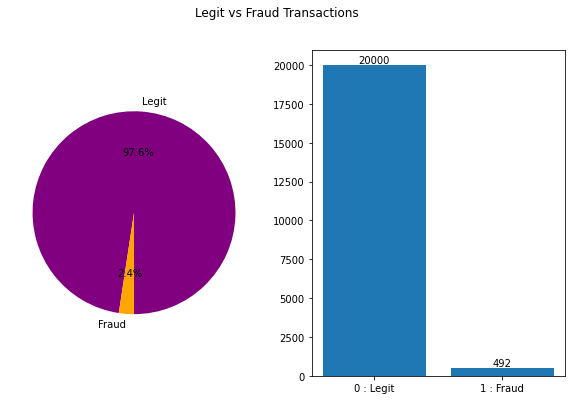

In [31]:
plotting(df['Class'])

In [32]:
legit["Amount"].describe()

count    20000.000000
mean        87.405036
std        241.066567
min          0.000000
25%          5.380000
50%         21.295000
75%         77.000000
max      12910.930000
Name: Amount, dtype: float64

In [33]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [34]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<AxesSubplot:>

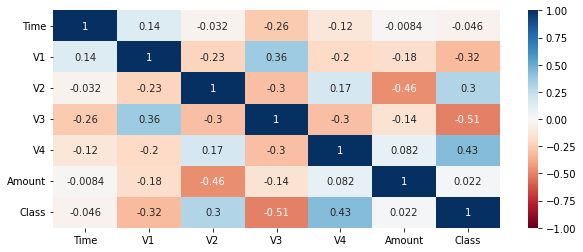

In [35]:
corr = df[['Time', 'V1', 'V2', 'V3', 'V4','Amount','Class']].corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax= 1 , annot=True)

### **Model Development and Validation**

In [36]:
def model_validation(X, y):
    model = LogisticRegression(max_iter=400, n_jobs=-1)

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    confusion = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test,y_pred)

    print(f"THE CONFUSION MATRIX:\n{confusion}\n")
    print(f"THE ACCURACY SCORE (Misleading): {accuracy}\n")
    print(f"THE CLASSIFICATION REPORT:\n{report}")
    

In [37]:
X_org = df.iloc[:,:30]
y_org = df.iloc[:,-1]

model_validation(X_org, y_org)

THE CONFUSION MATRIX:
[[3995    5]
 [  13   86]]

THE ACCURACY SCORE (Misleading): 0.995608685045133

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.95      0.87      0.91        99

    accuracy                           1.00      4099
   macro avg       0.97      0.93      0.95      4099
weighted avg       1.00      1.00      1.00      4099



---
## **Under-Sampling Techniques**
* **Manual:** We undersample the Majority class to match the size of Minority class
* **Imblearn Techniques:**
    * RandomUnderSampler
    * NearMiss
    * EditedNearestNeighbours
    * CondensedNearestNeighbours
    * InstanceHardnessThreshold
    * TomekLinks

| Undersampling Technique | Description | Pros & Cons |
| --- | --- | --- |
| RandomUnderSampler | Randomly selects a subset of majority class instances to balance the class distribution. | ✔️ Simple and effective. <br> ❌ May discard informative data. |
| NearMiss | Selects samples from the majority class that are closest to the minority class. | ✔️ Can help reduce class imbalance without discarding too many samples. <br> ❌ Only works well when the decision boundary is well-defined. |
| EditedNearestNeighbours | Removes majority class samples that are misclassified by the k-nearest neighbor classifier. | ✔️ Can improve the decision boundary by removing noisy samples. <br> ❌ May not work well when the decision boundary is complex.|
| CondensedNearestNeighbours | Creates a subset of the majority class that can represent the entire class. | ✔️ Can reduce the size of the dataset while still retaining the original distribution of classes. <br> ❌ Can be computationally expensive. |
| InstanceHardnessThreshold | Identifies samples that are misclassified with high certainty and removes them. | ✔️ Can remove samples that are likely to be noisy or mislabeled. <br> ❌ Can be sensitive to the choice of classifier. |
| TomekLinks | Identifies pairs of samples from different classes that are nearest neighbors and removes the majority class instance. | ✔️ Can help improve the decision boundary by removing noisy samples. <br> ❌ May not work well when the minority class is sparse. |


### **Manual Undersampling**

In [38]:
legit_sample = legit.sample(n=len(fraud))

df_manual_under = pd.concat([legit_sample, fraud], axis=0)
df_manual_under.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258028,158456.0,2.034883,0.284327,-2.396533,0.791946,0.676932,-0.899122,0.150210,-0.186130,0.765481,...,-0.029700,0.200956,-0.014932,0.454825,0.214874,0.704335,-0.040761,-0.007378,9.31,0
123358,76894.0,-3.743769,0.588051,0.603599,1.601632,-1.101007,0.519601,-1.560864,-1.909120,0.263053,...,-1.281613,1.034914,0.579611,0.436872,0.035116,-0.271347,-1.002611,0.559776,57.91,0
259377,159087.0,1.975821,-0.101014,-2.133557,0.269500,0.570056,-0.505033,0.126126,-0.158610,1.066338,...,-0.274778,-0.684725,0.088201,-0.044967,0.024438,-0.086924,-0.021561,-0.008965,63.22,0
164912,117071.0,1.379321,-0.955902,-2.276028,0.660305,0.132659,-0.873930,0.698722,-0.425980,0.226641,...,0.380609,0.402984,-0.286689,0.669812,-0.006043,0.609745,-0.132876,0.029890,370.66,0
102440,68207.0,-1.171197,1.039103,1.405342,0.972502,0.220715,-0.928678,0.344191,0.262082,-1.143424,...,0.179758,0.290998,-0.346720,0.435099,0.564471,-0.200885,-0.038164,-0.057133,5.00,0


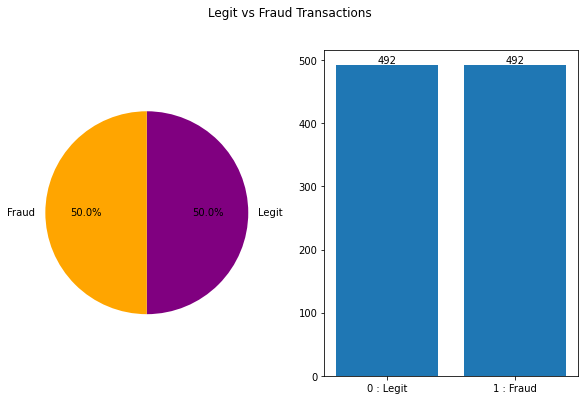

THE CONFUSION MATRIX:
[[94  5]
 [ 9 89]]

THE ACCURACY SCORE (Misleading): 0.9289340101522843

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        99
           1       0.95      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [39]:
plotting(df_manual_under["Class"])

X_under = df_manual_under.iloc[:,:30]
y_under = df_manual_under.iloc[:,-1]

model_validation(X_under, y_under)

### **RandomUnderSampler**

Shapes of resampled X and Y: ((984, 30), (984,))


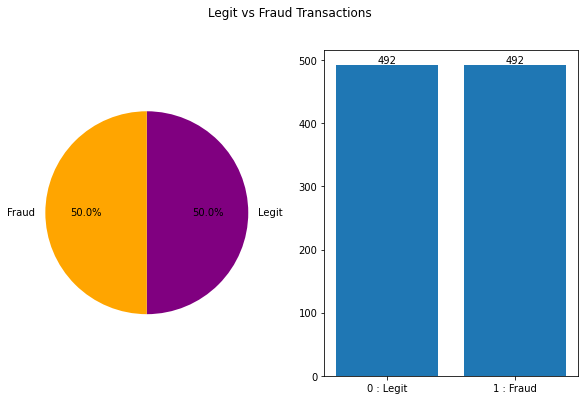

THE CONFUSION MATRIX:
[[98  1]
 [ 8 90]]

THE ACCURACY SCORE (Misleading): 0.9543147208121827

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        99
           1       0.99      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



In [40]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus_under, y_rus_under = rus.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_rus_under.shape, y_rus_under.shape)}")
plotting((pd.DataFrame(X_rus_under).join(y_rus_under))["Class"])

model_validation(X_rus_under, y_rus_under)

### **NearMiss**
NearMiss implements 3 different types of heuristic which can be selected with the parameter **version**<br>
NearMiss has three versions. version=1, version=2 and version=3

Shapes of resampled X and Y: ((984, 30), (984,))


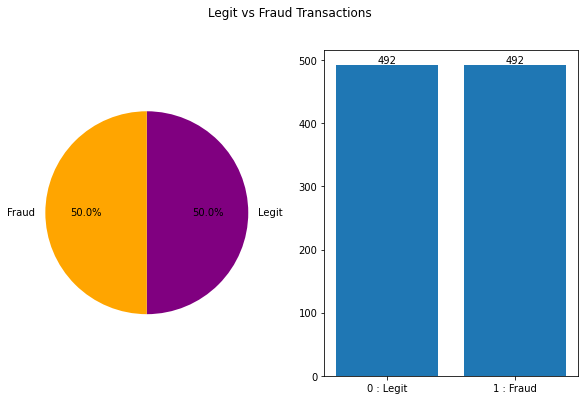

THE CONFUSION MATRIX:
[[94  5]
 [ 7 91]]

THE ACCURACY SCORE (Misleading): 0.9390862944162437

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.95      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [41]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X_nm1_under, y_nm1_under = nm1.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_nm1_under.shape, y_nm1_under.shape)}")
plotting((pd.DataFrame(X_nm1_under).join(y_nm1_under))["Class"])

model_validation(X_nm1_under, y_nm1_under)

### **EditedNearestNeighbours**
Removes samples of the majority class for which their class differ from the one of their nearest-neighbors.<br>
This can be repeated which is the principle of the **RepeatedEditedNearestNeighbours**

* **NOTE:** It takes some time

Shapes of resampled X and Y: ((19670, 30), (19670,))


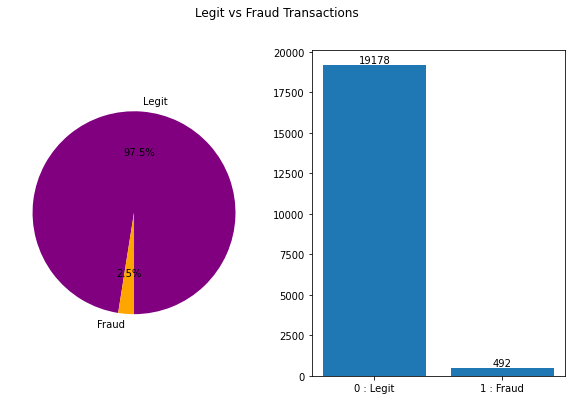

THE CONFUSION MATRIX:
[[3823    5]
 [  18   88]]

THE ACCURACY SCORE (Misleading): 0.9941535332994408

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3828
           1       0.95      0.83      0.88       106

    accuracy                           0.99      3934
   macro avg       0.97      0.91      0.94      3934
weighted avg       0.99      0.99      0.99      3934



In [42]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_enn_under, y_enn_under = enn.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_enn_under.shape, y_enn_under.shape)}")
plotting((pd.DataFrame(X_enn_under).join(y_enn_under))["Class"])

model_validation(X_enn_under, y_enn_under)

### **CondensedNearestNeighbour**
Makes use of a 1-NN to iteratively decide if a sample should be kept in a dataset or not.<br>
The issue is that CondensedNearestNeighbour is sensitive to noise by preserving the noisy samples.

* **NOTE:** It takes a lot of time

In [44]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour()
X_cnn_under, y_cnn_under = cnn.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_cnn_under.shape, y_cnn_under.shape)}")
plotting((pd.DataFrame(X_cnn_under).join(y_cnn_under))["Class"])

model_validation(X_cnn_under, y_cnn_under)

### **InstanceHardnessThreshold**
Uses the prediction of classifier to exclude samples.<br>All samples which are classified with a low probability will be removed.

* **NOTE:** It takes a lot of time

Shapes of resampled X and Y: ((16864, 30), (16864,))


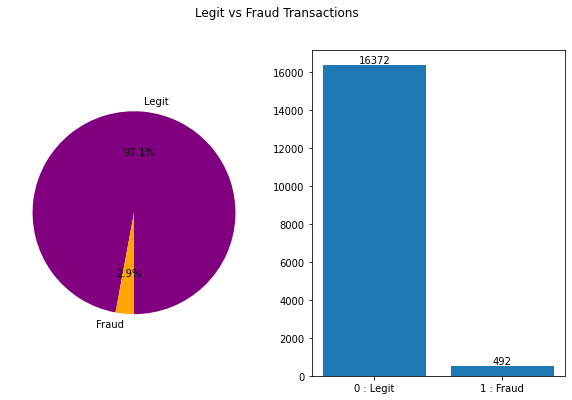

THE CONFUSION MATRIX:
[[3258    9]
 [  16   90]]

THE ACCURACY SCORE (Misleading): 0.9925882004150608

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3267
           1       0.91      0.85      0.88       106

    accuracy                           0.99      3373
   macro avg       0.95      0.92      0.94      3373
weighted avg       0.99      0.99      0.99      3373



In [45]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold()
X_iht_under, y_iht_under = iht.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_iht_under.shape, y_iht_under.shape)}")
plotting((pd.DataFrame(X_iht_under).join(y_iht_under))["Class"])

model_validation(X_iht_under, y_iht_under)

### **TomekLinks**
Under-sampling by removing Tomek’s links.

* **NOTE:** It takes some time

Shapes of resampled X and Y: ((20353, 30), (20353,))


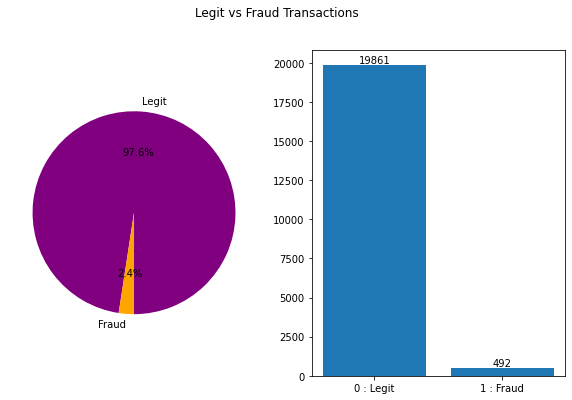

THE CONFUSION MATRIX:
[[3971    8]
 [  19   73]]

THE ACCURACY SCORE (Misleading): 0.993367722918202

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3979
           1       0.90      0.79      0.84        92

    accuracy                           0.99      4071
   macro avg       0.95      0.90      0.92      4071
weighted avg       0.99      0.99      0.99      4071



In [46]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl_under, y_tl_under = tl.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_tl_under.shape, y_tl_under.shape)}")
plotting((pd.DataFrame(X_tl_under).join(y_tl_under))["Class"])

model_validation(X_tl_under, y_tl_under)

---
## **Over-Sampling Techniques**
* **Manual:** We oversample the Minority class to match the size of Majority class
* **Imblearn Techniques:**
    * RandomOverSampler
    * SMOTE (Synthetic Minority Over-sampling Technique)
    * ADASYN (Adaptive Synthetic)
    * SVMSMOTE
    * BorderlineSMOTE
    * KMeansSMOTE
    * SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)
    * SMOTEN (Synthetic Minority Over-sampling Technique for Nominal)

| Oversampling Technique | Description | Pros and Cons |
| --- | --- | --- |
| RandomOverSampler | Randomly duplicates minority class samples to balance the class distribution. | ✔️ Simple and easy to implement. <br> ❌ May lead to overfitting and increased computational time. |
| SMOTE | Creates synthetic minority class samples by interpolating between existing samples. | ✔️ Can generate diverse synthetic samples and reduce overfitting. <br> ❌ May not work well with complex data distributions. |
| ADASYN | Generates more synthetic samples for minority class samples that are difficult to learn. | ✔️ Can adapt to the data distribution and generate more synthetic samples where they are needed the most. <br> ❌ May lead to overfitting and noisy samples. |
| SVMSMOTE | Uses an SVM to generate synthetic samples in the areas between minority and majority class samples. | ✔️ Can generate diverse synthetic samples and reduce overfitting. <br> ❌ May be computationally expensive and sensitive to the choice of kernel function. |
| BorderlineSMOTE | Generates synthetic samples for minority class samples that are near the majority class boundary. | ✔️ Can generate more relevant synthetic samples and reduce overfitting. <br> ❌ May not work well with sparse datasets. |
| KMeansSMOTE | Uses KMeans clustering to generate synthetic samples. | ✔️ Can generate diverse synthetic samples and reduce overfitting. <br> ❌ May be computationally expensive and sensitive to the choice of KMeans parameters. |
| SMOTENC | A variation of SMOTE that can handle datasets with mixed continuous and categorical features. | ✔️ Can generate synthetic samples that are representative of the original dataset. <br> ❌ May not work well with high-dimensional datasets. |
| SMOTEN | A variation of SMOTE that can handle datasets with categorical features. | ✔️ Can generate synthetic samples that are representative of the original dataset. <br> ❌ May not work well with high-dimensional datasets. |


### **RandomOverSampler**
Random over-sampler can be used to repeat some samples and balance the number of samples between the dataset.

Shapes of resampled X and Y: ((40000, 30), (40000,))


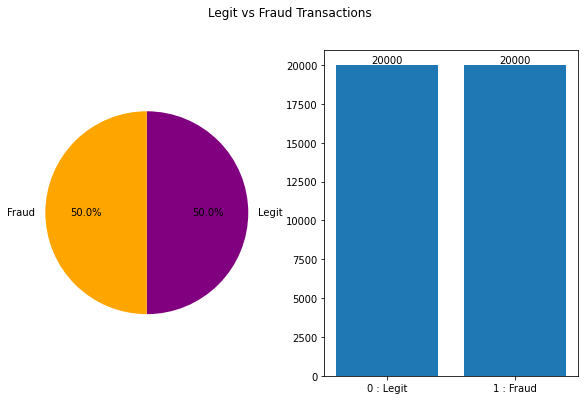

THE CONFUSION MATRIX:
[[3884  130]
 [ 374 3612]]

THE ACCURACY SCORE (Misleading): 0.937

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4014
           1       0.97      0.91      0.93      3986

    accuracy                           0.94      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.94      0.94      0.94      8000



In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros_over, y_ros_over = ros.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_ros_over.shape, y_ros_over.shape)}")
plotting((pd.DataFrame(X_ros_over).join(y_ros_over))["Class"])

model_validation(X_ros_over, y_ros_over)

### **SMOTE (Synthetic Minority Over-sampling Technique)**

Shapes of resampled X and Y: ((40000, 30), (40000,))


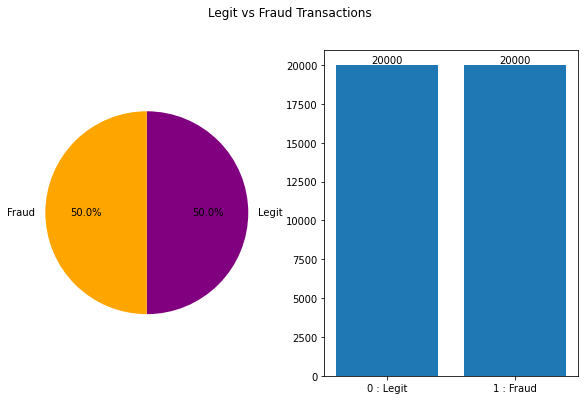

THE CONFUSION MATRIX:
[[3968   46]
 [ 156 3830]]

THE ACCURACY SCORE (Misleading): 0.97475

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4014
           1       0.99      0.96      0.97      3986

    accuracy                           0.97      8000
   macro avg       0.98      0.97      0.97      8000
weighted avg       0.98      0.97      0.97      8000



In [48]:
from imblearn.over_sampling import SMOTE
smote =  SMOTE()
X_smote_over, y_smote_over = smote.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_smote_over.shape, y_smote_over.shape)}")
plotting((pd.DataFrame(X_smote_over).join(y_smote_over))["Class"])

model_validation(X_smote_over, y_smote_over)

### **ADASYN (Adaptive Synthetic)**
This method is similar to SMOTE but it generates different number of samples depending<br>
on an estimate of the local distribution of the class to be oversampled.

Shapes of resampled X and Y: ((39942, 30), (39942,))


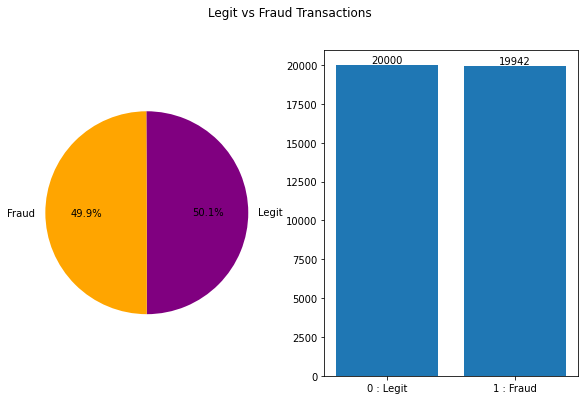

THE CONFUSION MATRIX:
[[3921   72]
 [ 145 3851]]

THE ACCURACY SCORE (Misleading): 0.9728376517711854

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3993
           1       0.98      0.96      0.97      3996

    accuracy                           0.97      7989
   macro avg       0.97      0.97      0.97      7989
weighted avg       0.97      0.97      0.97      7989



In [49]:
from imblearn.over_sampling import ADASYN
ads =  ADASYN()
X_ads_over, y_ads_over = ads.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_ads_over.shape, y_ads_over.shape)}")
plotting((pd.DataFrame(X_ads_over).join(y_ads_over))["Class"])

model_validation(X_ads_over, y_ads_over)

### **SVMSMOTE**
Variant of SMOTE algorithm which use an SVM algorithm to detect<br>
sample to use for generating new synthetic samples

Shapes of resampled X and Y: ((40000, 30), (40000,))


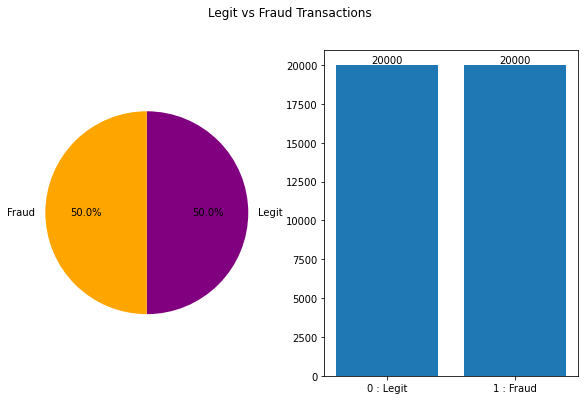

THE CONFUSION MATRIX:
[[3969   45]
 [  86 3900]]

THE ACCURACY SCORE (Misleading): 0.983625

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4014
           1       0.99      0.98      0.98      3986

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000



In [50]:
from imblearn.over_sampling import SVMSMOTE
svms =  SVMSMOTE(n_jobs=-1)
X_svms_over, y_svms_over = svms.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_svms_over.shape, y_svms_over.shape)}")
plotting((pd.DataFrame(X_svms_over).join(y_svms_over))["Class"])

model_validation(X_svms_over, y_svms_over)

### **Borderline SMOTE**
This algorithm is a variant of the original SMOTE algorithm<br>
Borderline samples will be detected and used to generate new synthetic samples.

Shapes of resampled X and Y: ((40000, 30), (40000,))


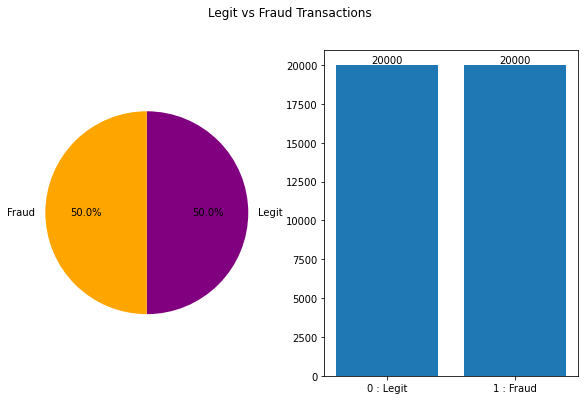

THE CONFUSION MATRIX:
[[3899  115]
 [ 154 3832]]

THE ACCURACY SCORE (Misleading): 0.966375

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4014
           1       0.97      0.96      0.97      3986

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000



In [51]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote =  BorderlineSMOTE(n_jobs=-1)
X_bsmote_over, y_bsmote_over = bsmote.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_bsmote_over.shape, y_bsmote_over.shape)}")
plotting((pd.DataFrame(X_bsmote_over).join(y_bsmote_over))["Class"])

model_validation(X_bsmote_over, y_bsmote_over)

### **KMeans SMOTE**
This algorithm apples a KMeans clustering before to over-sample using SMOTE.

* **NOTE:** Use it when you've more than 2 clusters

In [53]:
from imblearn.over_sampling import KMeansSMOTE
ksmote =  KMeansSMOTE(n_jobs=-1)
X_ksmote_over, y_ksmote_over = ksmote.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_ksmote_over.shape, y_ksmote_over.shape)}")
plotting((pd.DataFrame(X_ksmote_over).join(y_ksmote_over))["Class"])

model_validation(X_ksmote_over, y_ksmote_over)

### **SMOTENC**
It stands for Synthetic Minority Over-sampling Technique for Nominal and Continuous.<br> 

* **NOTE:** Use it when dealing with a mix of continuous and categorical<br> features, SMOTENC is the only method which can handle this case.

In [12]:
from imblearn.over_sampling import SMOTENC

# You must use a dataset that has categorical features in order for it to work
smoteNC =  SMOTENC(categorical_features=[0, 2])
X_smoteNC_over, y_smoteNC_over = smoteNC.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_smoteNC_over.shape, y_smoteNC_over.shape)}")
plotting((pd.DataFrame(X_smoteNC_over).join(y_smoteNC_over))["Class"])

model_validation(X_smoteNC_over, y_smoteNC_over)

### **SMOTEN**
It stands for Synthetic Minority Over-sampling Technique for Nominal.<br> 

* **NOTE:** Use it when dealing with categorical features only

Shapes of resampled X and Y: ((40000, 30), (40000,))


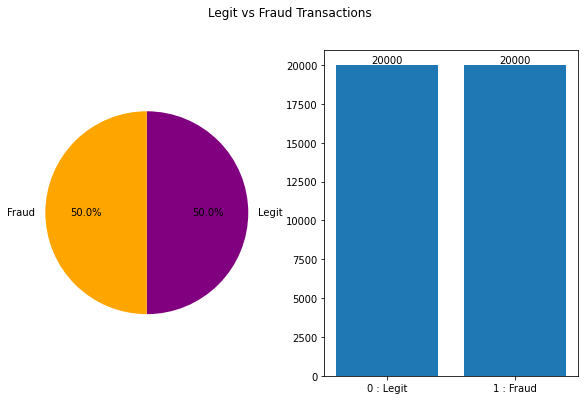

THE CONFUSION MATRIX:
[[4008    6]
 [  20 3966]]

THE ACCURACY SCORE (Misleading): 0.99675

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4014
           1       1.00      0.99      1.00      3986

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [54]:
from imblearn.over_sampling import SMOTEN

smoteN =  SMOTEN()
X_smoteN_over, y_smoteN_over = smoteN.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_smoteN_over.shape, y_smoteN_over.shape)}")
plotting((pd.DataFrame(X_smoteN_over).join(y_smoteN_over))["Class"])

model_validation(X_smoteN_over, y_smoteN_over)

---
## **Hybrid Techniques**
These algorithms combine undersampling and oversampling
* **SMOTEENN:**
* **SMOTETomek:**



| Hybrid Technique | Description | Pros and Cons |
| --- | --- | --- |
| SMOTEENN | A hybrid technique that combines the undersampling technique of Edited Nearest Neighbors (ENN) with the oversampling technique of SMOTE. | ✔️ Can effectively address the problem of both over- and under-sampling. <br> ❌ May be computationally expensive and sensitive to the choice of parameters. |
| SMOTETomek | A hybrid technique that combines the undersampling technique of Tomek links with the oversampling technique of SMOTE. | ✔️ Can effectively address the problem of both over- and under-sampling. <br> ❌ May not work well with imbalanced datasets with very different class distributions. |


### **SMOTEENN**
Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.

* **NOTE:** It takes a lot of time


Shapes of resampled X and Y: ((30010, 30), (30010,))


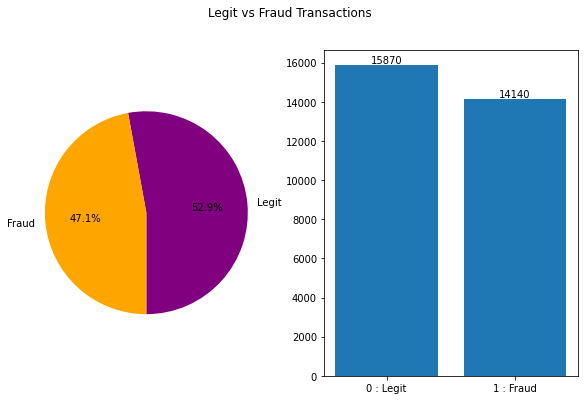

THE CONFUSION MATRIX:
[[2795   47]
 [ 101 3059]]

THE ACCURACY SCORE (Misleading): 0.9753415528157281

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2842
           1       0.98      0.97      0.98      3160

    accuracy                           0.98      6002
   macro avg       0.97      0.98      0.98      6002
weighted avg       0.98      0.98      0.98      6002



In [57]:
from imblearn.combine import SMOTEENN
smoteNN =  SMOTEENN(n_jobs=-1)
X_smoteNN_hybrid, y_smoteNN_hybrid = smoteNN.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_smoteNN_hybrid.shape, y_smoteNN_hybrid.shape)}")
plotting((pd.DataFrame(X_smoteNN_hybrid).join(y_smoteNN_hybrid))["Class"])

model_validation(X_smoteNN_hybrid, y_smoteNN_hybrid)

### **SMOTETomek**
Combine over- and under-sampling using SMOTE and Tomek links.


Shapes of resampled X and Y: ((33488, 30), (33488,))


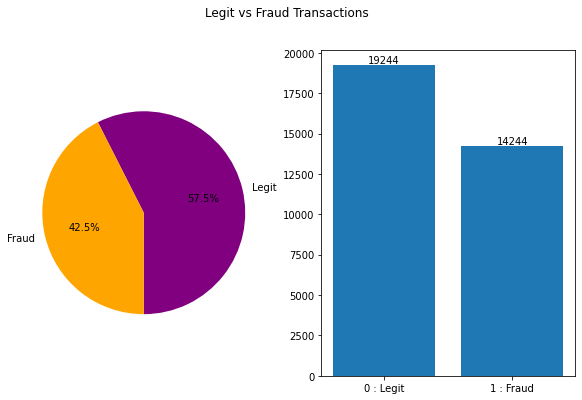

THE CONFUSION MATRIX:
[[3785  103]
 [ 158 2652]]

THE ACCURACY SCORE (Misleading): 0.9610331442221559

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3888
           1       0.96      0.94      0.95      2810

    accuracy                           0.96      6698
   macro avg       0.96      0.96      0.96      6698
weighted avg       0.96      0.96      0.96      6698



In [58]:
from imblearn.combine import SMOTETomek
smoteT =  SMOTETomek(sampling_strategy = 0.75, n_jobs=-1)
X_smoteT_hybrid, y_smoteT_hybrid = smoteT.fit_resample(X_org, y_org)

print(f"Shapes of resampled X and Y: {(X_smoteT_hybrid.shape, y_smoteT_hybrid.shape)}")
plotting((pd.DataFrame(X_smoteT_hybrid).join(y_smoteT_hybrid))["Class"])

model_validation(X_smoteT_hybrid, y_smoteT_hybrid)

---
## **Ensemble Models**
Luckily there're a few models that perform quite well even on Imbalanced data

* **EasyEnsembleClassifier**
* **Decision Tree**
* **Random Forest**
* **GBT (Gradient Boosting Tree)**
* **HistGB (Histogram Gradient Boosting)**
* **XGBoost (Extreme Gradient Boosting)** 
* **LGBM (Light Gradient Boosted Machine)**

| Ensemble Technique | Description | Pros and Cons |
| --- | --- | --- |
| EasyEnsembleClassifier | A bagging ensemble technique that creates multiple balanced subsets of the majority class and trains a classifier on each subset. | ✔️ Can effectively handle imbalanced datasets with very large class imbalances. <br> ❌ May not work well with datasets with multiple minority classes. |
| Decision Tree | A popular ensemble technique that can be used for classification or regression tasks | ✔️ Can handle imbalanced datasets effectively when used with class weights or cost-sensitive learning. <br> ❌ May be prone to overfitting on noisy data or datasets with a large number of features. |
| Random Forest | An extension of decision trees that builds a forest of multiple decision trees and aggregates their predictions | ✔️ Can handle imbalanced datasets effectively when used with class weights or cost-sensitive learning. <br> ❌ May be less interpretable than a single decision tree. |
| Gradient Boosting Tree | A boosting ensemble technique that sequentially trains weak classifiers, with each subsequent classifier focusing on the misclassified samples of the previous classifier. | ✔️ Can handle imbalanced datasets effectively when used with class weights or cost-sensitive learning. <br> ❌ May be prone to overfitting on noisy data or datasets with a large number of features. |
| Histogram Gradient Boosting | A variant of GBT that uses histograms to approximate the distribution of features and reduce computation time | ✔️ Can handle imbalanced datasets effectively when used with class weights or cost-sensitive learning. <br> ❌ May require a large amount of memory for training on large datasets. |
| XGBoost | An optimized implementation of GBT that uses additional regularization techniques to prevent overfitting | ✔️ Can handle imbalanced datasets effectively when used with class weights or cost-sensitive learning. <br> ❌ May require tuning of many hyperparameters for optimal performance. |
| LightGBM | A variant of GBT that uses gradient-based one-sided sampling to reduce computation time and reduce overfitting | ✔️ Can handle imbalanced datasets effectively when used with class weights or cost-sensitive learning. <br> ❌ May not perform well on datasets with a large number of categorical features. |


### **EasyEnsembleClassifier**
Bag of balanced boosted learners also known as EasyEnsemble.

This algorithm is an ensemble of AdaBoost learners trained on different<br> balanced bootstrap samples. The balancing is achieved by random under-sampling.

* **NOTE:** It has a Bug related to Scikit-Learn. Future version may work

In [60]:
from imblearn.ensemble import EasyEnsembleClassifier

eec =  EasyEnsembleClassifier()
# eec.fit(X_org, y_org)

# print(f"Shapes of resampled X and Y: {(X_eec_over.shape, y_eec_over.shape)}")
# plotting((pd.DataFrame(X_eec_over).join(y_eec_over))["Class"])

# model_validation(X_eec_over, y_eec_over)


### **Decision Tree**

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

confusion = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

print(f"THE CONFUSION MATRIX:\n{confusion}\n")
print(f"THE ACCURACY SCORE (Misleading): {accuracy}\n")
print(f"THE CLASSIFICATION REPORT:\n{report}")

THE CONFUSION MATRIX:
[[3978   23]
 [  20   78]]

THE ACCURACY SCORE (Misleading): 0.9895096364967065

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4001
           1       0.77      0.80      0.78        98

    accuracy                           0.99      4099
   macro avg       0.88      0.90      0.89      4099
weighted avg       0.99      0.99      0.99      4099



### **Random Forest**

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

confusion = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

print(f"THE CONFUSION MATRIX:\n{confusion}\n")
print(f"THE ACCURACY SCORE (Misleading): {accuracy}\n")
print(f"THE CLASSIFICATION REPORT:\n{report}")

THE CONFUSION MATRIX:
[[4016    2]
 [  15   66]]

THE ACCURACY SCORE (Misleading): 0.99585264698707

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4018
           1       0.97      0.81      0.89        81

    accuracy                           1.00      4099
   macro avg       0.98      0.91      0.94      4099
weighted avg       1.00      1.00      1.00      4099



### **Gradient Boosting for classification**

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

confusion = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

print(f"THE CONFUSION MATRIX:\n{confusion}\n")
print(f"THE ACCURACY SCORE (Misleading): {accuracy}\n")
print(f"THE CLASSIFICATION REPORT:\n{report}")

THE CONFUSION MATRIX:
[[3992   13]
 [  15   79]]

THE ACCURACY SCORE (Misleading): 0.9931690656257623

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4005
           1       0.86      0.84      0.85        94

    accuracy                           0.99      4099
   macro avg       0.93      0.92      0.92      4099
weighted avg       0.99      0.99      0.99      4099



### **Histogram-based Gradient Boosting Classification Tree**

In [67]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2)

hgbc.fit(X_train, y_train)
y_pred = hgbc.predict(X_test)

confusion = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

print(f"THE CONFUSION MATRIX:\n{confusion}\n")
print(f"THE ACCURACY SCORE (Misleading): {accuracy}\n")
print(f"THE CLASSIFICATION REPORT:\n{report}")

THE CONFUSION MATRIX:
[[3991    4]
 [  17   87]]

THE ACCURACY SCORE (Misleading): 0.9948767992193218

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3995
           1       0.96      0.84      0.89       104

    accuracy                           0.99      4099
   macro avg       0.98      0.92      0.94      4099
weighted avg       0.99      0.99      0.99      4099



### **XGBoost (Extreme Gradient Boosting Technique)**

In [68]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

confusion = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

print(f"THE CONFUSION MATRIX:\n{confusion}\n")
print(f"THE ACCURACY SCORE (Misleading): {accuracy}\n")
print(f"THE CLASSIFICATION REPORT:\n{report}")

THE CONFUSION MATRIX:
[[3998    5]
 [  17   79]]

THE ACCURACY SCORE (Misleading): 0.9946328372773847

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4003
           1       0.94      0.82      0.88        96

    accuracy                           0.99      4099
   macro avg       0.97      0.91      0.94      4099
weighted avg       0.99      0.99      0.99      4099



### **LightGBM (Light Gradient Boosting Machine)**

In [69]:
import lightgbm as ltb

lgbm = ltb.LGBMClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2)

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

confusion = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

print(f"THE CONFUSION MATRIX:\n{confusion}\n")
print(f"THE ACCURACY SCORE (Misleading): {accuracy}\n")
print(f"THE CLASSIFICATION REPORT:\n{report}")

THE CONFUSION MATRIX:
[[4010    3]
 [  15   71]]

THE ACCURACY SCORE (Misleading): 0.995608685045133

THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4013
           1       0.96      0.83      0.89        86

    accuracy                           1.00      4099
   macro avg       0.98      0.91      0.94      4099
weighted avg       1.00      1.00      1.00      4099

